In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
df=pd.read_csv("D://DS//diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#here we are not using mean of glucose values because if the data has outliers it may get impacted.
#we don't require scaling in random forest classifier because we use decision trees in this,,so scaling would have no impact on result. we can use scaling in knn, svm and logistic regression

df["Glucose"]=np.where(df["Glucose"]==0,df["Glucose"].median(),df["Glucose"])
df["Insulin"]=np.where(df["Insulin"]==0,df["Insulin"].median(),df["Insulin"])
df["SkinThickness"]=np.where(df["SkinThickness"]==0,df["SkinThickness"].median(),df["SkinThickness"])

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,69.105469,27.334635,94.652344,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.438286,19.355807,9.229014,105.547598,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,0.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,62.000000,23.000000,30.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
target=df["Outcome"]
x=df.drop("Outcome",axis=1)


In [7]:
target

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,target,test_size=0.20,stratify=target, random_state=2)

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


In [10]:
from sklearn import svm
from sklearn.svm import SVC
svc=SVC()

In [11]:
#MODEL TRAINING

svc.fit(x_train,y_train)

SVC()

In [12]:
#model prediction

x_train_pred=svc.predict(x_train)

target_prediction=svc.predict(x_test)

In [13]:
from sklearn import metrics
print(f"train_Accuracy: {metrics.accuracy_score(y_train,x_train_pred)}")
print(f"test_accuracy: {metrics.accuracy_score(y_test,target_prediction)}")

train_Accuracy: 0.7736156351791531
test_accuracy: 0.7857142857142857


<Axes: >

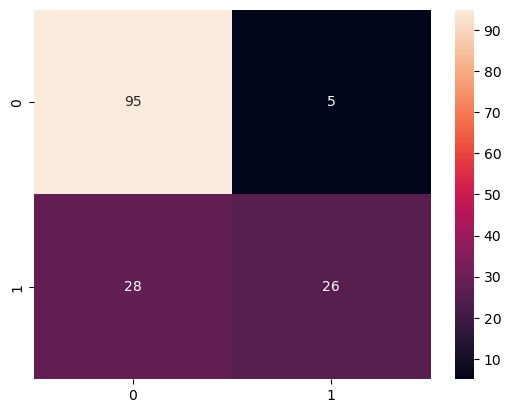

In [14]:
matrix=metrics.confusion_matrix(y_test,(target_prediction))
sns.heatmap(matrix,annot=True)

In [15]:
#using a Random forest classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=10)
rfc

RandomForestClassifier(n_estimators=10)

In [17]:
rf=rfc.fit(x_train,y_train)
target_pred=rf.predict(x_test)

In [18]:
target_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

<Axes: >

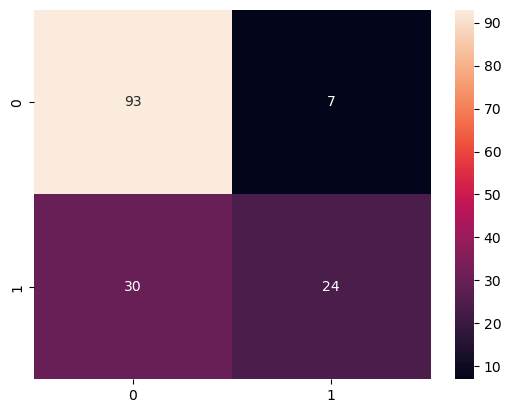

In [19]:
from sklearn import metrics

conf=metrics.confusion_matrix(y_test,(target_pred))
sns.heatmap(conf,annot=True)

In [20]:
metrics.accuracy_score(target_pred,y_test)

0.7597402597402597

In [21]:
from sklearn.metrics import classification_report

classification_report(y_test,target_pred)

'              precision    recall  f1-score   support\n\n           0       0.76      0.93      0.83       100\n           1       0.77      0.44      0.56        54\n\n    accuracy                           0.76       154\n   macro avg       0.77      0.69      0.70       154\nweighted avg       0.76      0.76      0.74       154\n'

In [22]:
#trying changing the parameters

rfc=RandomForestClassifier(n_estimators=500,criterion="entropy",max_features="sqrt",min_samples_leaf=10,min_samples_split=10,random_state=30)

In [23]:
rfc.fit(x_train,y_train)
prediction_1=rfc.predict(x_test)

print(metrics.accuracy_score(prediction_1,y_test))

0.7337662337662337


<Axes: >

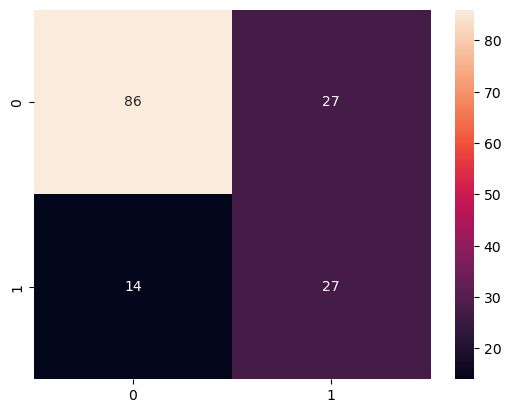

In [24]:
confusion_matrix=metrics.confusion_matrix(prediction_1,y_test)
sns.heatmap(confusion_matrix,annot=True)

In [25]:
#here Random forest is giving better accuracy than Support vector machine